In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.regularizers import l2

In [12]:
import os
# Set the working directory
working_dir = 'C:/Users/admad/Documents/VSC Workspace/LNG'
os.chdir(working_dir)

# Specify the file and sheet name
file_path = "C:/Users/admad/Documents/VSC_Workspace/LNG/Rawdata_Mar25.xlsx"
sheet_name = 'Weekly data_160K CBM'

df = pd.read_excel(file_path, sheet_name=sheet_name)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

In [21]:
# === User Input ===
TARGET_VARIABLE = 'LNG 160K CBM Spot Rate $/day'
MARKET_FEATURES = 'LNG 160K CBM 1 Year Timecharter Rate $/day,LNG 160K CBM 3 Year Timecharter Rate $/day'
MARKET_FEATURES = [col.strip() for col in MARKET_FEATURES if col.strip()]

future_weeks = 54  # Default number of future weeks to forecast (can be changed)

Epoch 1/100


c:\Users\admad\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0396 - val_loss: 0.0206
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0227 - val_loss: 0.0174
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0197 - val_loss: 0.0145
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0167 - val_loss: 0.0129
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0126 - val_loss: 0.0106
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0120 - val_loss: 0.0089
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0091 - val_loss: 0.0077
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0078 - val_loss: 0.0071
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0061 - val_loss: 0.0089
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0063 - val_loss: 0.0057
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0048 - val_loss: 0.0064
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0

C:\Users\admad\AppData\Local\Temp\ipykernel_36216\3670078654.py:78: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

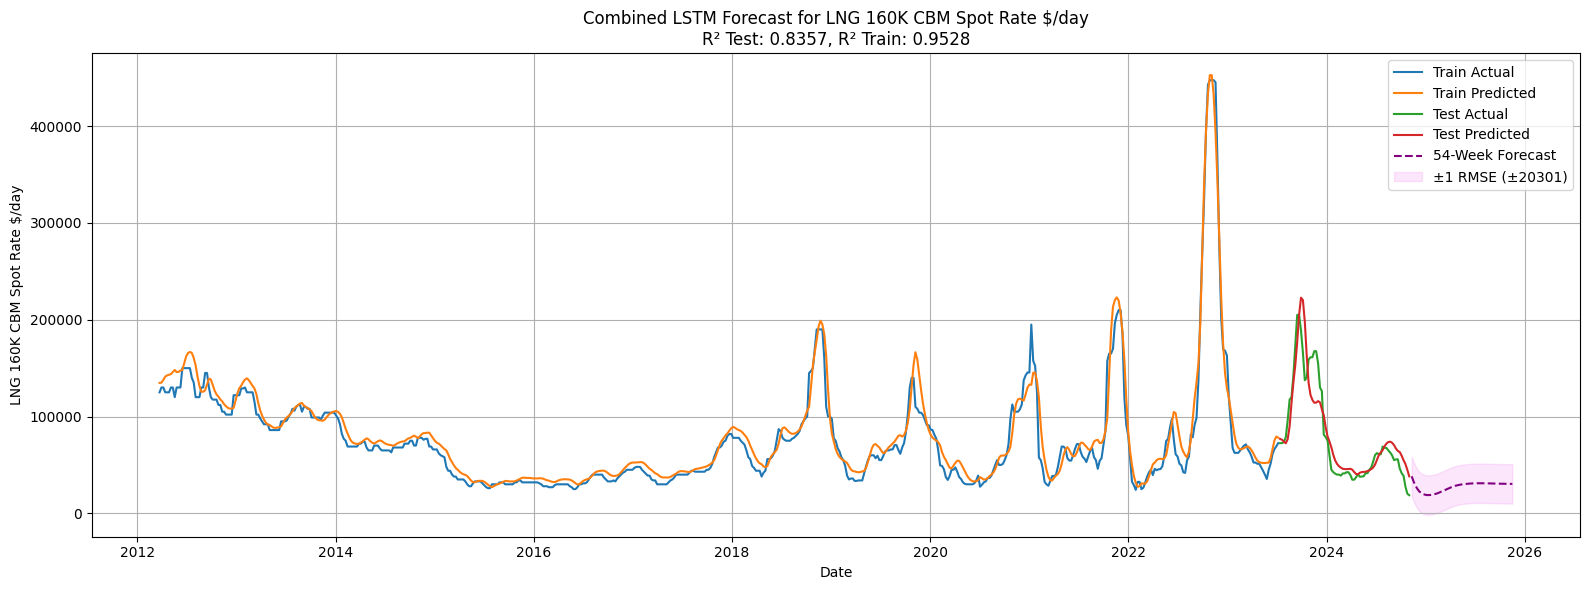

In [ ]:
# === Feature Engineering (Combining Both Models) ===
df['Lag_1'] = df[TARGET_VARIABLE].shift(1)
df['Lag_2'] = df[TARGET_VARIABLE].shift(2)
df['Lag_3'] = df[TARGET_VARIABLE].shift(3)
df['MA_3'] = df[TARGET_VARIABLE].rolling(window=3).mean()
df['MA_7'] = df[TARGET_VARIABLE].rolling(window=7).mean()
df['ROC_1'] = (df[TARGET_VARIABLE] - df['Lag_1']) / df['Lag_1']
df['ROC_2'] = (df[TARGET_VARIABLE] - df['Lag_2']) / df['Lag_2']

# Add user-selected market context features
for col in MARKET_FEATURES:
    if col in df.columns:
        df[f'{col}_Lag_1'] = df[col].shift(1)
        df[f'{col}_MA_4'] = df[col].rolling(window=4).mean()
        df[f'{col}_ROC'] = df[col].pct_change()

# Drop rows with NA (from lag/rolling)
df.dropna(inplace=True)

feature_cols = [col for col in df.columns if col not in ['Date'] and col != TARGET_VARIABLE] + [TARGET_VARIABLE]

# === Scaling ===
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[feature_cols])

# === Sequence Generator ===
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len][-1])
    return np.array(X), np.array(y)

# === Model Parameters ===
sequence_length = 30
train_ratio = 0.9
train_size = int(len(data_scaled) * train_ratio)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size - sequence_length:]

X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# === LSTM Model ===
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(128),
    Dropout(0.3),
    Dense(1, kernel_regularizer=l2(0.01))
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

# === Inverse Transform and Evaluate ===
target_scaler = MinMaxScaler()
target_scaler.fit(df[[TARGET_VARIABLE]])

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_actual = target_scaler.inverse_transform(y_train.reshape(-1, 1))
test_actual = target_scaler.inverse_transform(y_test.reshape(-1, 1))
train_pred = target_scaler.inverse_transform(y_train_pred)
test_pred = target_scaler.inverse_transform(y_test_pred)

# === Forecast Future ===


last_sequence = X_test[-1]
future_preds = []
for _ in range(future_weeks):
    next_pred = model.predict(last_sequence.reshape(1, sequence_length, -1))
    future_preds.append(next_pred[0, 0])
    new_step = np.copy(last_sequence[-1])
    new_step[-1] = next_pred
    last_sequence = np.vstack([last_sequence[1:], new_step])

future_preds = np.array(future_preds).reshape(-1, 1)
future_inv = target_scaler.inverse_transform(future_preds)
future_dates = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(weeks=1), periods=future_weeks, freq='W')

# === Display Future Predictions ===
print("\n📈 Future Predictions:")
for date, value in zip(future_dates, future_inv.flatten()):
    print(f"{date.strftime('%Y-%m-%d')}: {value:.2f}")

# === Metrics ===
def print_metrics(y_true, y_pred, label):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{label} Performance:")
    print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.4f}")
    return rmse, r2

rmse_test, r2_test = print_metrics(test_actual, test_pred, "Test")
rmse_train, r2_train = print_metrics(train_actual, train_pred, "Train")

# === Plot ===
plt.figure(figsize=(16, 6))
date_index = df['Date'].iloc[sequence_length:].reset_index(drop=True)

# Create date ranges for all segments
train_dates = date_index[:len(train_actual)]
test_dates = date_index[len(train_actual):len(train_actual) + len(test_actual)]
future_dates_range = pd.date_range(start=test_dates.iloc[-1] + pd.Timedelta(weeks=1), periods=future_weeks, freq='W')

plt.plot(train_dates, train_actual, label='Train Actual')
plt.plot(train_dates, train_pred, label='Train Predicted')
plt.plot(test_dates, test_actual, label='Test Actual')
plt.plot(test_dates, test_pred, label='Test Predicted')

plt.plot(future_dates_range, future_inv, label=f'{future_weeks}-Week Forecast', linestyle='--', color='purple')
plt.fill_between(future_dates_range,
                 (future_inv - rmse_test).flatten(),
                 (future_inv + rmse_test).flatten(),
                 color='violet', alpha=0.2, label=f'±1 RMSE (±{rmse_test:.0f})')

plt.title(f"LSTM Forecast for {TARGET_VARIABLE}\nR² Test: {r2_test:.4f}, c")
plt.xlabel("Date")
plt.ylabel(TARGET_VARIABLE)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
# === Plotly Visualization ===
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=train_dates, y=train_actual.flatten(), name='Train Actual', hovertemplate='Date: %{x|%Y-%m-%d}<br>Value: %{y:.2f}'))
fig.add_trace(go.Scatter(x=train_dates, y=train_pred.flatten(), name='Train Predicted', hovertemplate='Date: %{x|%Y-%m-%d}<br>Value: %{y:.2f}'))
fig.add_trace(go.Scatter(x=test_dates, y=test_actual.flatten(), name='Test Actual', hovertemplate='Date: %{x|%Y-%m-%d}<br>Value: %{y:.2f}'))
fig.add_trace(go.Scatter(x=test_dates, y=test_pred.flatten(), name='Test Predicted', hovertemplate='Date: %{x|%Y-%m-%d}<br>Value: %{y:.2f}'))
fig.add_trace(go.Scatter(x=future_dates_range, y=future_inv.flatten(), mode='lines', name=f'{future_weeks}-Week Forecast', line=dict(dash='dash', color='purple'), hovertemplate='Date: %{x|%Y-%m-%d}<br>Forecast: %{y:.2f}'))

# Add confidence interval
fig.add_trace(go.Scatter(
    x=future_dates_range.tolist() + future_dates_range[::-1].tolist(),
    y=np.concatenate([(future_inv - rmse_test).flatten(), (future_inv + rmse_test)[::-1].flatten()]),
    fill='toself',
    fillcolor='rgba(200, 100, 255, 0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name=f'±1 RMSE (±{rmse_test:.0f})'
))

fig.update_layout(
    title=f"Combined LSTM Forecast for {TARGET_VARIABLE}<br>R² Test: {r2_test:.4f}, R² Train: {r2_train:.4f}",
    xaxis_title="Date",
    yaxis_title=TARGET_VARIABLE,
    legend=dict(x=0.01, y=0.99),
    template="plotly_white",
    height=600
)

fig.show()

